In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 10.4 MB/s 
     |████████████████████████████████| 9.8 MB 34.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Data wrangling

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array
from pandas import read_csv
from pandas import datetime

#Machine Learning
from sklearn import preprocessing

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime, timedelta

import keras
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Stats
from sklearn.metrics import mean_absolute_error
from math import sqrt

#Arima
import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [ ]:

home1_meter = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/train.csv')

home1_weather = pd.read_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/data/train.csv')


In [ ]:
home1_meter[home1_meter.duplicated(subset = 'Date & Time', keep=False)]

,Date & Time,use [kW],gen [kW],DL bedroom outlets [kW],SPGR outlets [kW],BL bedroom outlets [kW],DL closets office lights [kW],BL closets office lights [kW],Bedpod dryer [kW],Bedpod washer [kW],Kitchenette outlets [kW],Kitchenette fridge + coffee [kW]


In [ ]:
home1_meter

,Date & Time,use [kW],gen [kW],DL bedroom outlets [kW],SPGR outlets [kW],BL bedroom outlets [kW],DL closets office lights [kW],BL closets office lights [kW],Bedpod dryer [kW],Bedpod washer [kW],Kitchenette outlets [kW],Kitchenette fridge + coffee [kW]
0,1/1/16 0:00,0.104283,0,0.043083,0.002167,0.035933,0.001667,0.000017,0.000500,0.001583,0.018117,0.002883
1,1/1/16 0:01,0.104100,0,0.043050,0.002183,0.035850,0.001650,0.000017,0.000500,0.001600,0.018067,0.002867
2,1/1/16 0:02,0.104167,0,0.043050,0.002167,0.035933,0.001667,0.000000,0.000500,0.001583,0.018083,0.002850
3,1/1/16 0:03,0.104050,0,0.043017,0.002167,0.035850,0.001650,0.000017,0.000500,0.001583,0.018067,0.002867
4,1/1/16 0:04,0.104133,0,0.043050,0.002167,0.035883,0.001667,0.000000,0.000517,0.001583,0.018067,0.002850
...,...,...,...,...,...,...,...,...,...,...,...,...
86395,2/29/16 23:55,0.132217,0,0.047467,0.002250,0.059333,0.001783,0.000017,0.000517,0.001400,0.018350,0.002833
86396,2/29/16 23:56,0.131950,0,0.047400,0.002233,0.059133,0.001783,0.000017,0.000517,0.001400,0.018350,0.002833
86397,2/29/16 23:57,0.131817,0,0.047383,0.002233,0.059017,0.001767,0.000000,0.000533,0.001400,0.018350,0.002833
86398,2/29/16 23:58,0.131150,0,0.046833,0.002250,0.058850,0.001783,0.000017,0.000517,0.001417,0.018367,0.002850


In [ ]:
home1_meter['Date & Time'] = pd.to_datetime(home1_meter['Date & Time'])


In [ ]:
plt.figure(figsize=(20, 10))
heatmap_daily = sns.heatmap(merged_daily.corr()[['House overall [kW]']].sort_values(by='House overall [kW]', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_daily.set_title('Features Correlating with House overall ', fontdict={'fontsize':18}, pad=16);

NameError: ignored

<Figure size 1440x720 with 0 Axes>




# **LSTM** 

Feature Selection based on correlation 

**Hourly Predictions**

In [ ]:
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class
deep_learner = DeepModelTS(
data = home1_meter,
Y_var = 'use [kW]',
lag = 15,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel()


Epoch 1/10
30/30 [==============================] - 6s 52ms/step - loss: 1.9589 - val_loss: 1.3320
Epoch 2/10
30/30 [==============================] - 1s 25ms/step - loss: 1.0633 - val_loss: 1.1641
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.9472 - val_loss: 0.9440
Epoch 4/10
30/30 [==============================] - 1s 26ms/step - loss: 0.8368 - val_loss: 0.9206
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.8151 - val_loss: 0.8495
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.7690 - val_loss: 0.7979
Epoch 7/10
30/30 [==============================] - 1s 18ms/step - loss: 0.7392 - val_loss: 0.7677
Epoch 8/10
30/30 [==============================] - 1s 20ms/step - loss: 0.7173 - val_loss: 0.7527
Epoch 9/10
30/30 [==============================] - 1s 22ms/step - loss: 0.7014 - val_loss: 0.7294
Epoch 10/10
30/30 [==============================] - 1s 24ms/step - loss: 0.6857 - val_loss: 0.7152


In [ ]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = LSTM_hourly['House overall [kW]'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)

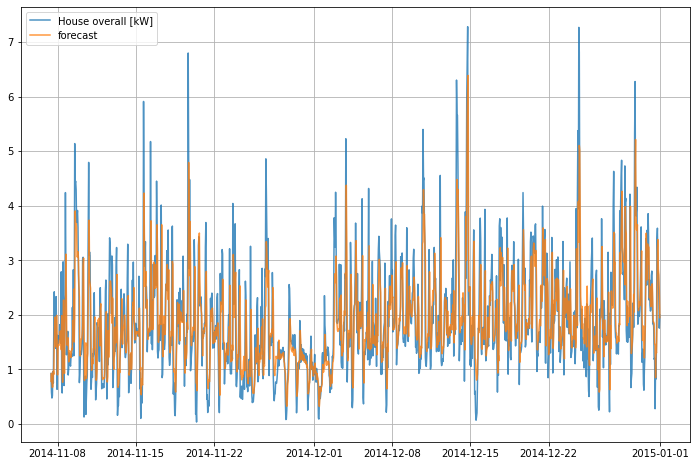

In [ ]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = LSTM_hourly.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['House overall [kW]', 'forecast']:
  plt.plot(
    'Date & Time',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()
plt.show()

In [ ]:

LSTM_MAE_hourly = mean_absolute_error(fc['House overall [kW]'], fc['forecast'])
LSTM_MAE_hourly


0.5181401662293

In [ ]:
ass2=fc[['Date & Time','House overall [kW]','forecast']] 

In [ ]:
ass2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home1LSTM.csv',sep=',', index=False)

**Daily Predictions**

In [ ]:
class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class
deep_learner = DeepModelTS(
data = LSTM_daily,
Y_var = 'House overall [kW]',
lag = 6,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel()


Epoch 1/10
2/2 [==============================] - 2s 234ms/step - loss: 1501.9508 - val_loss: 2164.5549
Epoch 2/10
2/2 [==============================] - 0s 28ms/step - loss: 1464.2198 - val_loss: 2111.8928
Epoch 3/10
2/2 [==============================] - 0s 28ms/step - loss: 1425.6046 - val_loss: 2054.7466
Epoch 4/10
2/2 [==============================] - 0s 28ms/step - loss: 1384.4462 - val_loss: 1990.8577
Epoch 5/10
2/2 [==============================] - 0s 27ms/step - loss: 1339.2579 - val_loss: 1917.4937
Epoch 6/10
2/2 [==============================] - 0s 29ms/step - loss: 1288.3734 - val_loss: 1830.8845
Epoch 7/10
2/2 [==============================] - 0s 30ms/step - loss: 1229.4286 - val_loss: 1725.8655
Epoch 8/10
2/2 [==============================] - 0s 29ms/step - loss: 1159.3333 - val_loss: 1595.5814
Epoch 9/10
2/2 [==============================] - 0s 30ms/step - loss: 1074.1538 - val_loss: 1432.6312
Epoch 10/10
2/2 [==============================] - 0s 38ms/step - loss: 

In [ ]:
deep_learner = DeepModelTS(
data = LSTM_daily,
Y_var = 'House overall [kW]',
lag = 24, # 24 past hours are used
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)
model = deep_learner.LSTModel()

Epoch 1/10
2/2 [==============================] - 1s 233ms/step - loss: 2500.4512 - val_loss: 3266.9512
Epoch 2/10
2/2 [==============================] - 0s 42ms/step - loss: 2264.7957 - val_loss: 4798.8433
Epoch 3/10
2/2 [==============================] - 0s 43ms/step - loss: 2166.9880 - val_loss: 5700.4473
Epoch 4/10
2/2 [==============================] - 0s 40ms/step - loss: 2307.9089 - val_loss: 3454.2993
Epoch 5/10
2/2 [==============================] - 0s 37ms/step - loss: 2147.5562 - val_loss: 3812.1370
Epoch 6/10
2/2 [==============================] - 0s 37ms/step - loss: 2505.0469 - val_loss: 4748.4766
Epoch 7/10
2/2 [==============================] - 0s 37ms/step - loss: 2621.3604 - val_loss: 4369.1309
Epoch 8/10
2/2 [==============================] - 0s 38ms/step - loss: 2825.2483 - val_loss: 4421.4087
Epoch 9/10
2/2 [==============================] - 0s 37ms/step - loss: 3138.1316 - val_loss: 4295.0894
Epoch 10/10
2/2 [==============================] - 0s 40ms/step - loss: 

In [ ]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = LSTM_daily['House overall [kW]'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)

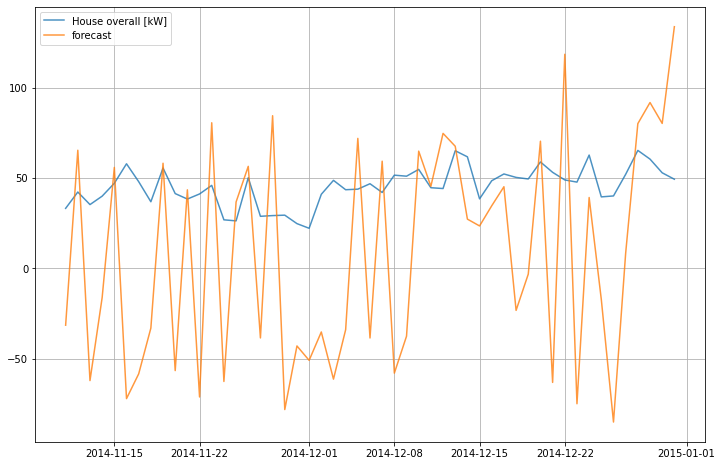

In [ ]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = LSTM_daily.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['House overall [kW]', 'forecast']:
  plt.plot(
    'Date & Time',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()
plt.show()

In [ ]:
 
LSTM_MAE_daily = mean_absolute_error(fc['House overall [kW]'], fc['forecast'])
LSTM_MAE_daily 


55.8721494463182

In [ ]:
ass2=fc[['Date & Time','House overall [kW]','forecast']]

In [ ]:
ass2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home1.csv',sep=',', index=False)

**ARIMA Model**

The ARIMA model can be broken down into three different components, each one with a parameter representing the characteristics of the time series.

*   Auto-regressive: AR(p)
*   Integrated: I(d)
*   Moving Average: MA (q)

To build a time-series model, one that you can use to predict future values, the dataset needs to be stationary.

Using **Dickey-Fuller Test** helps to verify whether the data series is Stationary or not. For our time series to be stationary, the p-value from the test has to be ≤ 0.01.

We can also test **Stationarity** if it has constant statistical properties over time, ie. the following:

*   constant mean
*   constant variance
*   An autocovariance that does not depend on time.

There are 2 major reasons behind non-stationaruty of a TS:

**Trend**– varying mean over time. 

**Seasonality** – variations at specific time-frames. eg people might use more electricity during particular seasons.

If the data set is not stationary we can use below techniques that transform the data, without changing its properties:

1. **Differencing** subtract each data point by the value of a specific time point in the series, e.g., always subtract by the value of the next period

2. **Decomposition** this technique is going to isolate each component of the time-series that was mentioned at the beginning (trend, seasonality, cycle, irregularity) and provide the residuals.


In [ ]:
#ds=array(dataset).flatten()
ds=merged_daily.iloc[:,[0]]
ds_hourly=merged_hourly.iloc[:,[0]]
array(ds)
array(ds_hourly)

array([[3.936655  ],
       [1.91677556],
       [2.32777389],
       ...,
       [2.34025389],
       [1.755305  ],
       [1.99554167]])

**Daily Predictions**

In [ ]:
#Augmented Dickey-Fuller Test
# log_dataset: boolean indicating if we want to log-transform the dataset before running Augmented Dickey-Fuller test
from numpy import log
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset, log_dataset):
    ds = dataset
    if log_dataset:
        ds = dataset.apply(lambda x: log(x))
        ds.dropna(inplace=True)  
    result = adfuller(ds)  
    print('Augmented Dickey-Fuller Test')
    print('test statistic: %.10f' % result[0])
    print('p-value: %.10f' % result[1])
    print('critical values')
    for key, value in result[4].items():
        print('\t%s: %.10f' % (key, value))


In [ ]:
adf_test(ds,True)

Augmented Dickey-Fuller Test
test statistic: -2.9440940297
p-value: 0.0404555020
critical values
	1%: -3.4487489052
	5%: -2.8696473721
	10%: -2.5710891239


In [ ]:
adf_test(ds,False)

Augmented Dickey-Fuller Test
test statistic: -2.2405915062
p-value: 0.1918441755
critical values
	1%: -3.4491185701
	5%: -2.8698097655
	10%: -2.5711757061


Both the normal dataset as well as the log-transformed dataset has the p value greater than 0.01, so we are going to differencing the dataset.

In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(11, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

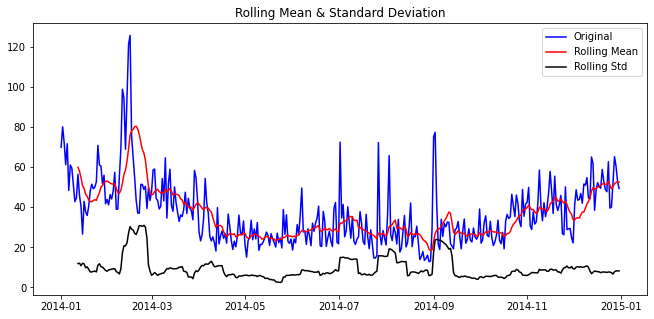

In [ ]:
test_stationarity(ds)

**Differencing**

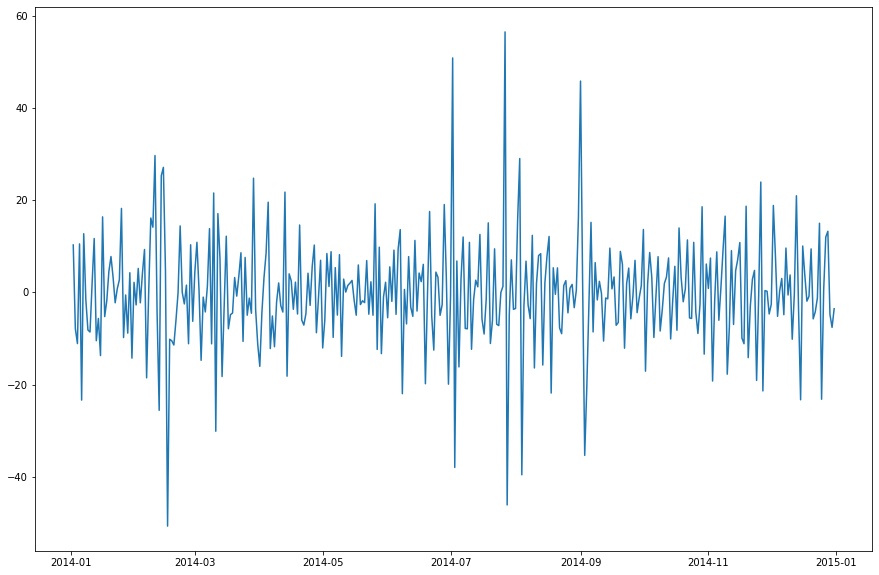

In [ ]:
diff_data = merged_daily.iloc[:,[0]].diff()
diff_data.dropna(inplace=True)
plt.figure(figsize=(15, 10))
plt.plot(diff_data)
plt.show()

Testing the differencing data for Stationarity.

In [ ]:
adf_test(diff_data,True)

Augmented Dickey-Fuller Test
test statistic: -13.1260061224
p-value: 0.0000000000
critical values
	1%: -3.4682803642
	5%: -2.8782017241
	10%: -2.5756525796


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
adf_test(diff_data,False)

Augmented Dickey-Fuller Test
test statistic: -7.3029928499
p-value: 0.0000000001
critical values
	1%: -3.4493918438
	5%: -2.8699298019
	10%: -2.5712397066


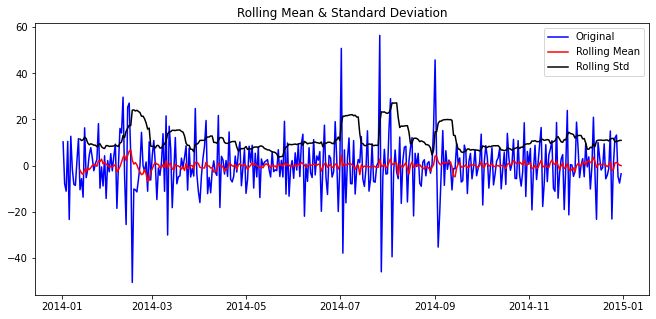

In [ ]:
test_stationarity(diff_data)

After differencing, Now the normal dataset as well as the log-transformed dataset has the p-value less than 0.01. But still we can see trend and Seasonility.


**Eliminating Trend and Seasonality**

Lets discuss two ways of removing trend and seasonality:

Differencing – taking the differece with a particular time lag.

Decomposition – modeling both trend and seasonality and removing them from the model.

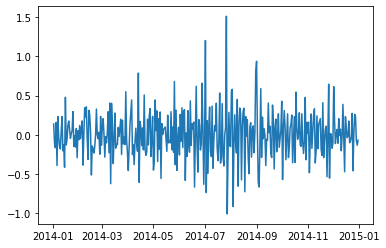

In [ ]:
ts_log = np.log(ds)
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
plt.plot(ts_log_diff)
plt.show()

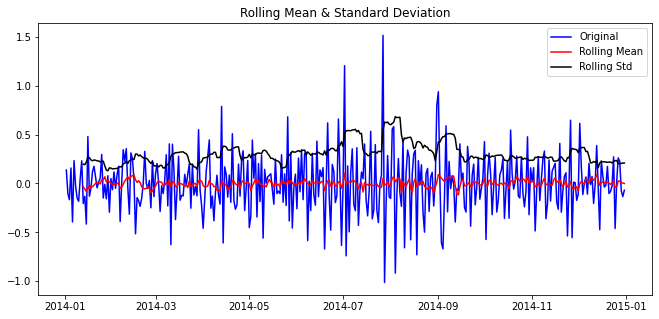

In [ ]:
test_stationarity(ts_log_diff)

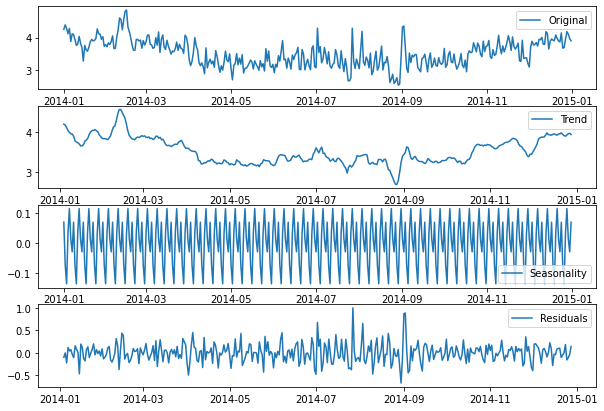

<Figure size 432x288 with 0 Axes>

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10, 7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals

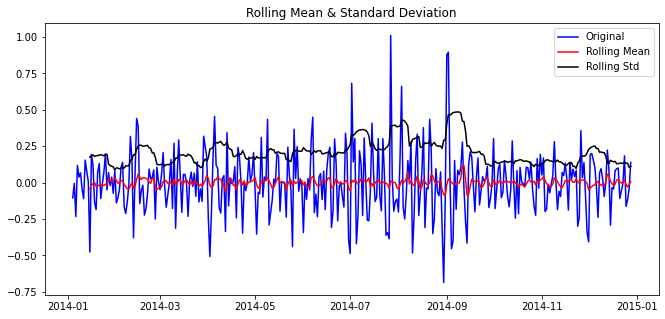

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.
 The predictors depend on the parameters (p,d,q) of the ARIMA model:


1.   Number of AR (Auto-Regressive) terms (p)
2.   Number of Differences (d) 
3.   Number of MA (Moving Average) terms (q)

**Auto-regressive: AR(p)**
Auto-regressive models explain random processes as linear combinations, such that the output variable depends linearly on its previous values and a random variable.
The parameter p indicates the number of autoregressive terms, as in, the number of terms in your linear combination. To find the value of p, we’ll use the Autocorrelation Function plot.

In [ ]:
dta = ts_log_diff
#ds=ts_log_diff

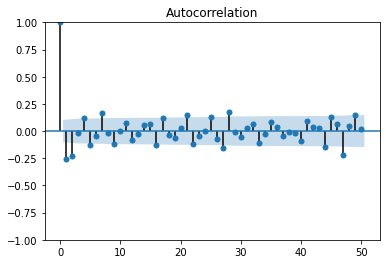

In [ ]:
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=50)
plt.show()

**Integrated: I(d)**
How many times the dataset was differenced, which is indicated by the value of parameter d. Since we differenced the data once, the value of d is one.

 **Moving Average: MA (q)**
 To determine the moving average profile we’ll use a subset of ACF, the Partial Autocorrelation Function plot, usually referred to as PACF plot.

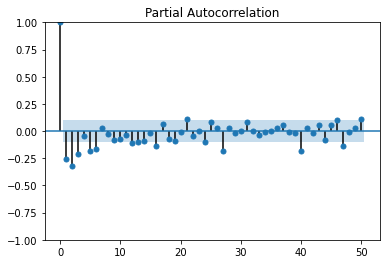

In [ ]:

sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=50, method="yw")
plt.show()

Analyzing the ACF plot, we can see any spike slightly outside of the confidence band, so we’ll assume that AR(1).
As for the PACF plot we can see the first spike at lag=1, so we’ll pick MA(1).
We have our model, ARIMA(1,1,1) 

In [ ]:
model = ARIMA(ds, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     House overall [kW]   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1378.292
Date:                Sun, 10 Apr 2022   AIC                           2762.584
Time:                        19:18:16   BIC                           2774.275
Sample:                    01-01-2014   HQIC                          2767.230
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4891      0.042     11.720      0.000       0.407       0.571
ma.L1         -0.9201      0.023    -39.370      0.000      -0.966      -0.874
sigma2       113.5844      4.928     23.050      0.0

We can use auto_arima(), to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.


In [ ]:
import pmdarima as pm

model = pm.auto_arima(ds, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2839.327, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2821.003, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2793.580, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2837.335, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2764.519, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2766.237, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2766.016, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2768.610, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2791.537, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2767.630, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2762.584, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2791.615, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2819.018, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2764.297, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]          

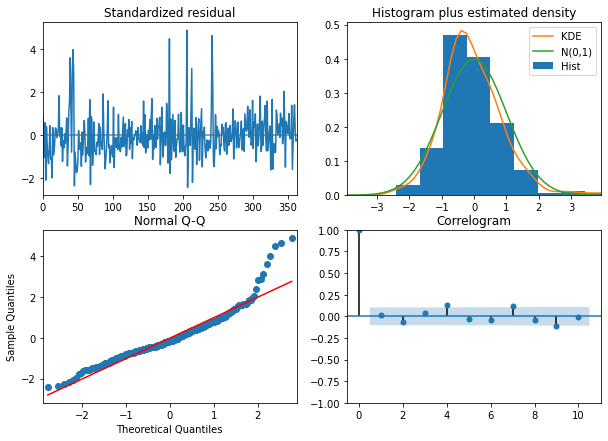

In [ ]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
# evaluate an ARIMA model using a walk-forward validation

def arima_model(electrictydata,testsize,p,d,q):
	X = electrictydata.values
	size = int(len(X) - testsize)
	train, test = X[0:size], X[size:len(X)]
	history = [x for x in train]
	predictions = list()
	# walk-forward validation
	for t in range(len(test)):
		model = ARIMA(history, order=(p,d,q))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		print('predicted=%f, expected=%f' % (yhat, obs))
	# evaluate forecasts
	rmse = sqrt(mean_squared_error(test, predictions))
	mae = mean_absolute_error(test, predictions)
	mape = np.mean(np.abs(predictions - test)/np.abs(test))
	print('Test RMSE: %.3f' % rmse)
	print('Test MAE: %.3f' % mae)
	print('Test MAPE: %.3f' % mape)

	# Constructing the forecast dataframe
	fc = electrictydata.tail(len(predictions)).copy()
	fc.reset_index(inplace=True)	
	fc['predicted'] = predictions
	ass2=fc[['Date & Time','House overall [kW]','predicted']]
	ass2.to_csv('/gdrive/MyDrive/Smart Energy/Electricity demand prediction/Home1Arima.csv',sep=',', index=False)

  
	fc.rename(columns = {'House overall [kW]': 'actual'}, 
          inplace=True)
	plt.figure(figsize=(12, 5))
	plt.title("Arima model for Electricity prediction for December 2014 for HOME 1 dataset.")
 #plt.title("Arima model for hourly prediction for December 2014 for HOME 1 dataset.")
	for dtype in ['actual', 'predicted']:
		plt.plot(
    	'Date & Time',
    	dtype,
    	data=fc,
    	label=dtype,
    	alpha=0.8
		)
 		
	plt.legend()
	plt.grid()
	plt.show()


In [ ]:
#Arima model for hourly
X = ds
arima_model(X,30,1,1,1)

In [ ]:
fc

In [ ]:
ass2=[['','']]

**ARIMA for Hourly time intervals**

In [ ]:
adf_test(ds_hourly,False)

In [ ]:
test_stationarity(ds_hourly.tail(800))

In [ ]:
sm.graphics.tsa.plot_acf(ds_hourly.values.squeeze(), lags=50)
plt.show()

In [ ]:
sm.graphics.tsa.plot_pacf(ds_hourly.values.squeeze(), lags=10, method="yw")
plt.show()

predicted=1.134234, expected=1.066965
predicted=1.173364, expected=1.272995
predicted=1.333439, expected=0.896028
predicted=1.031004, expected=1.008211
predicted=1.131449, expected=0.764777
predicted=0.936249, expected=1.016619
predicted=1.141886, expected=0.907474
predicted=1.047768, expected=0.832281
predicted=0.992590, expected=0.689088
predicted=0.882439, expected=0.107346
predicted=0.430290, expected=0.087573
predicted=0.433204, expected=0.389162
predicted=0.669754, expected=0.685292
predicted=0.892461, expected=0.463409
predicted=0.709107, expected=0.546993
predicted=0.782173, expected=0.667285
predicted=0.873562, expected=0.697852
predicted=0.893774, expected=1.223936
predicted=1.305886, expected=1.304146
predicted=1.351966, expected=1.000183
predicted=1.111480, expected=1.270588
predicted=1.333558, expected=1.136240
predicted=1.219010, expected=2.350757
predicted=2.176923, expected=1.808108
predicted=1.711953, expected=1.652411
predicted=1.608718, expected=1.155043
predicted=1.

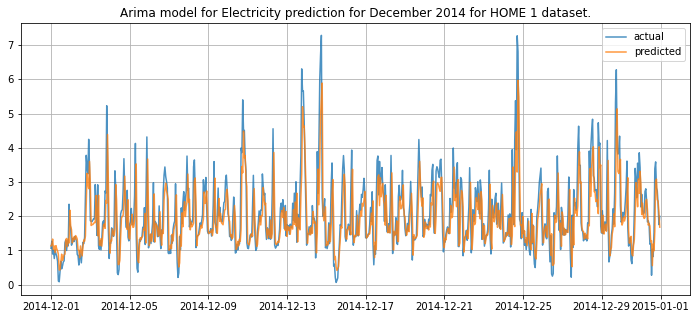

In [ ]:
X = ds_hourly
arima_model(X,744,1,0,1)

Error Function to calculate MAE for a given model

In [ ]:
LSTM_MAE = mean_absolute_error(fc['forecast'],yhat)
# ARIMA_MAE = 
# Naive_MAE = 
# SARIMA_MAE = 
LSTM_MAE

Comparison of how different models performed

**LSTM Try**
The model makes a prediction each 24 hours at midnight and forecasts the next 24 hours of demand. Traditional sequence predictions take in hourly consumption in sequnces corresponding to each day's 24 hours followed by the next until the end of the sequence. The method described in this notebook treats each hour of the day as independent. Therefore it considers 24 indivdual forecasts corresponding to each hour of the day. The benefit of this method is that 1) we take advantage of stronger direct (partial) autocorrelations between h0...h23 of today, the day prior and so on (compared with the autocrrelation between h0 and h1, h2, h3 etc) adn 2) it allows us to train on smaller datasets and capture seasonal effects
Here I compare the forecasting performance of using several different model types. Each model uses the same final two DNN layers with dropout. One of 128 units, and the final layer of 24 (the output horizon). Each of the models unique layers are:


1.   A three layer DNN (one layer plus the common bottom two layers)
2.   A CNN with two layers of 1D convolutions with max pooling. 
3. A LSTM with two LSTM layers.
4. A CNN stacked LSTM with layers from models 2 and 3 feeding into the common DNN layer.
5. A CNN stacked LSTM with a skip connection to the common DNN layer.
<br>
Each model is compared against baseline persistance models consisting of a one day persistence, and a three day average persistence. Added to the baseline error is the Transmission Service Operator's error.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

This guides us to understand where and how a model is performance. For example, if our bayes error is MAE 5% and our model training and validation perform at MAE 6% and 9% respectively then the relevant obserevation is that our model performs with high variance with respect to the baseline. The contrary is true if we consider baseline, train, and validation MAEs of 5%, 8%, and 8.5% respectively. In the latter case we should work on the bias of the training set before considering the validation performance (low variance).


def split_LSTM(train_hourly):
  # slice = int(frac / 100 * len(train_hourly))
  val_hourly = train_hourly['2014-11-01':]
  train_hourly = train_hourly[:'2014-10-30']

  return train_hourly, val_hourly

def min_max_scale(dataframe):
    """ Applies MinMax Scaling
    
        Wrapper for sklearn's MinMaxScaler class.
    """
    mm = MinMaxScaler()
    return mm.fit_transform(dataframe)
train_hourly, val_hourly = split_LSTM(train_hourly)
train_hourly = train_hourly[["House overall [kW]","Barn [kW]","Living room [kW]","Furnace [kW]","Kitchen [kW]","temperature","apparentTemperature","Solar [kW]", "dewPoint","Month","Day of the month","Day of the week"]]
val_hourly = val_hourly[["House overall [kW]","Barn [kW]","Living room [kW]","Furnace [kW]","Kitchen [kW]","temperature","apparentTemperature","Solar [kW]", "dewPoint","Month","Day of the month","Day of the week"]]
test_hourly = test_hourly[["House overall [kW]","Barn [kW]","Living room [kW]","Furnace [kW]","Kitchen [kW]","temperature","apparentTemperature","Solar [kW]", "dewPoint","Month","Day of the month","Day of the week"]]
**Hourly Model**

---


**Windowing the Dataset** <br>
Use tf.dataset to create a window dataset. This is a vector of past timesteps (n_steps) that is used to predict on a target vector of future steps (n_horizon). The example below shows the output for n_steps = 72 and n_horizon = 24 and the 5 features. So we use the last 3 days (72 hours) to predict the next day (following 24 hours).

The resulting shape for X will be (batch size, n_steps, features) and Y will be (batch size, n_horizon, features).



def set_window(data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=False, expand_dims=False):
    
    #create a window with n steps back plus the size of the prediction length
    window = n_steps + n_horizon
    
    #expand dimensions to 3D to fit with LSTM inputs
    #creat the inital tensor dataset
    if expand_dims:
        ds = tf.expand_dims(data, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(ds)
    else:
        ds = tf.data.Dataset.from_tensor_slices(data)

    #create the window function shifting the data by the prediction length
    ds = ds.window(window, shift=n_horizon, drop_remainder=True)
    #flatten the dataset and batch into the window size
    ds = ds.flat_map(lambda x : x.batch(window))
    ds = ds.shuffle(shuffle_buffer)    
    #create the supervised learning problem x and y and batch
    
    if multi_var:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:, :1]))
    else:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:]))
    
    ds = ds.batch(batch_size).prefetch(1)
    #print(f"Prediction lookback (n_steps): {n_steps}")
    #print(f"Prediction horizon (n_horizon): {n_horizon}")
    #print(f"Batch Size: {batch_size}")
    return ds
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

for X, y in dataset:
    print("Input:", X.numpy().shape, "Target:", y.numpy().shape)
#train_hourly = min_max_scale(train_hourly)
#set_window(train_hourly[:500], 72, 24, 1, 100, multi_var=True, expand_dims=False)
def build_dataset(train, test, val,
                  n_steps=24*30, 
                  n_horizon=24, 
                  batch_size=26, 
                  shuffle_buffer=500, 
                  expand_dims=False, 
                  multi_var=False):
    """If multi variate then first column is always the column from which the target is contstructed.
    """
    
    tf.random.set_seed(23)
    
    # if multi_var:
    #     mm = MinMaxScaler()
    #     for data in [train,test,val]:
    #       data = mm.fit_transform(data)
    
    # train_data, val_data, test_data = split_data(data, train_fraq=train_fraq, test_len=8760)
    
    # train_ds = window_dataset(train_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    # val_ds = window_dataset(val_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    # test_ds = window_dataset(test_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    

    train_ds = set_window(train, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)
    test_ds = set_window(test, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)
    val_ds = set_window(val, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = build_dataset(train_hourly, test_hourly, val_hourly, 72, 24, 1, 100, multi_var=True)
**HyperParameter Setting**
Define a set of model configurations so that we can call and run each model in the same way. The cgf_model_run dictionary will store the model, its history, and the test datasetset generated.

The default model parameters are:

n_steps: last 30 days <br>
n_horizon: next 24 hours <br>
learning rate: 3e-4 <br>

def get_params(multivar=False):
    lr = 3e-4
    n_steps=24*30
    n_horizon=24
    if multivar:
        n_features=12
    else:
        n_features=1
        
    return n_steps, n_horizon, n_features, lr

model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}


def run_model(model_name, model_func, model_configs, epochs):
    
    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    # train_ds, val_ds, test_ds = build_dataset(n_steps=n_steps, n_horizon=n_horizon, multi_var=True)

    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

Model Definitions
DNN
A single 128 unit layer plus the common 128 and 24 unit layyers with dropout.



def dnn_model(n_steps, n_horizon, n_features, lr):
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(n_steps, n_features)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='dnn')
    
    loss=tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model


dnn = dnn_model(*get_params(multivar=True))
dnn.summary()
CNN
Two Conv 1D layers with 64 filters each, and kernel sizes of 6 and 3 respectively. After each Conv1D layer a maxpooling1D layer with size of 2.


def cnn_model(n_steps, n_horizon, n_features, lr=3e-4):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="CNN")
    
    loss= tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

cnn = cnn_model(*get_params(multivar=True))
cnn.summary()
LSTM
Two LSTM layers with 72 and 48 units each.
def lstm_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(72, activation='relu', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm = lstm_model(*get_params(multivar=True))
lstm.summary()
CNN and LSTM Stacked
Using the same layers from the CNN and LSTM model, stack the CNN as input to the pair of LSTMs.
def lstm_cnn_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.LSTM(72, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="lstm_cnn")
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm_cnn = lstm_cnn_model(*get_params(multivar=True))
lstm_cnn.summary()
CNN and LSTM with a skip connection
The same CNN and LSTM layers as the previous models this time with a skip connection direct to the common DNN layer.
def lstm_cnn_skip_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
   
    inputs = tf.keras.layers.Input(shape=(n_steps,n_features), name='main')
    
    conv1 = tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu')(inputs)
    max_pool_1 = tf.keras.layers.MaxPooling1D(2)(conv1)
    conv2 = tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu')(max_pool_1)
    max_pool_2 = tf.keras.layers.MaxPooling1D(2)(conv2)
    lstm_1 = tf.keras.layers.LSTM(72, activation='relu', return_sequences=True)(max_pool_2)
    lstm_2 = tf.keras.layers.LSTM(48, activation='relu', return_sequences=False)(lstm_1)
    flatten = tf.keras.layers.Flatten()(lstm_2)
    
    skip_flatten = tf.keras.layers.Flatten()(inputs)

    concat = tf.keras.layers.Concatenate(axis=-1)([flatten, skip_flatten])
    drop_1 = tf.keras.layers.Dropout(0.3)(concat)
    dense_1 = tf.keras.layers.Dense(128, activation='relu')(drop_1)
    drop_2 = tf.keras.layers.Dropout(0.3)(dense_1)
    output = tf.keras.layers.Dense(n_horizon)(drop_2)
    
    model = tf.keras.Model(inputs=inputs, outputs=output, name='lstm_skip')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm_skip = lstm_cnn_skip_model(*get_params(multivar=True))
lstm_skip.summary()
tf.keras.utils.plot_model(lstm, show_shapes=True)
**Training the Models**
No of epochs = 150
model_configs=dict()
run_model("dnn", dnn_model, model_configs, epochs=150)
run_model("cnn", cnn_model, model_configs, epochs=150)
run_model("lstm", lstm_model, model_configs, epochs=150)
run_model("lstm_cnn", lstm_cnn_model, model_configs, epochs=150)
run_model("lstm_skip", lstm_cnn_skip_model, model_configs, epochs=150)
**Evaluation of Training/Validation Results**
Loss curves across the models are fairly stable. All models show a flat validation curve while training continues to decline. The LSTM appears to begin to become very overfit from about epoch 100 where the validation loss begins to rise. The lstm_skip also has a point around epoch 50 where the val loss stops decreasing. In all cases this is a sign the models are no longer learning against the validation set. Some options to help improve this are to introduce learning rate decline, or train on longer input sequences.

Plots of the MAE show a similar pattern to the loss plots.
legend = list()

fig, axs = plt.subplots(1, 5, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 5)
print("Loss Curves")
print("MAE Curves")
fig, axs = plt.subplots(1, 5, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mae', val, ax, 6)
**Evaluation of Test Results** 
The LSTM and the CNN stacked LSTM models clearly outperformed the other four models. Whats surprising is to see how well both a CNN and DNN did on their. LSTM would be expected to perform well because of its ability to learn and remember longer trends in the data.

Comparing to the baseline results the models' performance was poor. The dnn, cnn, lstm, and lstm_cnn models improved against the persistence error (MAE ~ 0.106) but did not improve against the TSO's prediction error (MAE ~0.015, MW error ~443).

Putting the models' performance in perspective however the results show how with a limited lookback window, and simple features a lstm, and a cnn stacked with an lstm are a good starting choice for architecture.
test_ds
names = list()
performance = list()

for key, value in model_configs.items():
    names.append(key)
    mae = value['model'].evaluate(value['test_ds'])
    performance.append(mae[1])
    
performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
performance_df['error_mw'] = performance_df['mae'] * df['House overall [kW]'].mean()
print(performance_df)    

**Visualizing Predictions**
Plot the actual and predicted 24 hour intervals. Below is the first 14 days of predictions. Interesting to note how the LSTM appears to oscilate over a longer frequency compared with the other models. The CNN also seems to capture the intra day oscillations (within the 24 hour period). Looking at the CNN stacked LSTM we can see how these two characteristics of the model's learning combine.



fig, axs = plt.subplots(5, 1, figsize=(18, 10))
days = 14

vline = np.linspace(0, days*24, days+1)

for (key, val), ax in zip(model_configs.items(), axs):

    test = val['test_ds']
    preds = val['model'].predict(test)

    xbatch, ybatch = iter(test).get_next()

    ax.plot(ybatch.numpy()[:days].reshape(-1))
    ax.plot(preds[:days].reshape(-1))
    ax.set_title(key)
    ax.vlines(vline, ymin=0, ymax=1, linestyle='dotted', transform = ax.get_xaxis_transform())
    ax.legend(["Actual", "Predicted"])

plt.xlabel("Hours Cumulative")
print('First Two Weeks of Predictions')
